In [29]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from matplotlib import pyplot as plt 
np.random.seed(15)

In [30]:
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
karate_label = np.loadtxt("karate_label.txt")
Graph = nx.read_adjlist("karate_club.adjlist", nodetype=int)
node_number = nx.to_pandas_adjacency(Graph).columns
adj = nx.to_numpy_array(adjlist)

In [31]:
def softmax(x):
    c = np.max(x)
    b = x-c
    exp_x = np.exp(b)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [32]:
class ann:
    def __init__(self, input_size, hidden_size,output_size):
        self.params = {}
        self.params['W1'] = np.random.randn(input_size,hidden_size)
        self.params['W2'] = np.random.randn(hidden_size,output_size)
    
    def gradient(self, x, y):
        W1,W2 = self.params['W1'],self.params['W2']
        h = np.dot(x,W1)        
        U2 = np.dot(h,W2)
        Y = softmax(U2)      
        diff = (Y-y)    
        ERR2 = np.outer(h,diff)
        ERR = np.outer(x,np.dot(W2,diff))        
        return ERR,ERR2,diff,Y        

In [33]:
d = 4
lr = 0.0001
t = 10
w = 3
r = 5

In [34]:
n_network = ann(input_size = 34,hidden_size = d,output_size = 34)

In [35]:
def random_walk(vertex,t):
    ans = []
    ans.append(vertex)
    
    while True:
        if len(ans) == t:
            return ans
            
        vertex_adj_list = list(adj[vertex]) 
        near_vertex_index = np.nonzero(vertex_adj_list)
        get_vertex = np.random.choice(list(near_vertex_index[0]),1)
        ans.append(get_vertex[0])
        vertex = get_vertex[0]

In [36]:
def skipgram(W,w,loss):
    new_loss = np.zeros(34)
    loss = 0
    for idx, vertex in enumerate(W):
        start = idx-w
        end = idx+w
        if start < 0:
            start = 0
        if end >= len(W):
            end = len(W)-1

        u_list = []
        u_list.extend(W[start:idx])
        u_list.extend(W[idx+1:end+1])
        
        for each_u in u_list:
            input_vertex = np.zeros(34)
            y_pred = np.zeros(34)
            v = vertex
            u = each_u
            input_vertex[v] = 1
            y_pred[u] = 1
            ERR,ERR2,diff,Y = n_network.gradient(input_vertex,y_pred)
            n_network.params['W1'] -= learning_rate * ERR
            n_network.params['W2'] -= learning_rate * ERR2
            loss += -np.log(Y[each_u])
    return loss

In [37]:
epoch = 200
epoch_loss2 = []
loss = np.zeros((34,34))
for _ in range(epoch):
    epoch_loss = 0
    for i in range(r):
        O = np.arange(34) 
        np.random.shuffle(O)    
        for vertex in O:
            W = random_walk(vertex,t)
            loss = skipgram(W,w,loss)
            epoch_loss += (loss /len(W))
    epoch_loss2.append(np.mean(epoch_loss)/(len(O)*r))

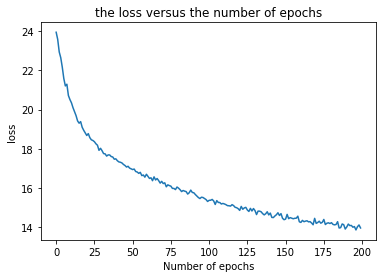

In [38]:
plt.plot(epoch_loss2)
plt.title("the loss versus the number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.show()